In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import os
import h5py
import numpy as np

module_path = os.path.join("/content/drive/MyDrive", "TEZ_ML_PART")
if module_path not in sys.path:
    sys.path.append(module_path)

# importing the module
try:
    from vgg_feature_extractor import VGGNet
    print("vgg_feature_extractor imported successfully!")
except ModuleNotFoundError:
    print("Could not import vgg_feature_extractor. Please ensure the file is in the correct Drive folder.")

vgg_feature_extractor imported successfully!


In [ ]:
images_path = os.path.join(module_path, "MBB_results")
img_list = [os.path.join(images_path, f) for f in os.listdir(images_path)]

In [ ]:
print(" start feature extraction")

model = VGGNet()

path = images_path + "/"

feats = []
names = []

for im in os.listdir(path): #iterate through all images to extract features
    print("Extracting features from image - ", im)
    X = model.extract_feat(path + im)

    feats.append(X)
    names.append(im)

feats = np.array(feats)

# directory for storing extracted features
output = "VGG16Features.h5"

print(" writing feature extraction results to h5 file")

if os.path.exists(output):
    os.remove(output)

h5f = h5py.File(output, 'w')
h5f.create_dataset('dataset_1', data = feats)
h5f.create_dataset('dataset_2', data = np.bytes_(names))
h5f.close()

 start feature extraction
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
Extracting features from image -  RGB_132_MBB_9e-05.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Extracting features from image -  RGB_132_MBB_0.0001901.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Extracting features from image -  RGB_132_MBB_0.0002902.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Extracting features from image -  RGB_132_MBB_0.0004904.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Extracting features from image -  RGB_132_MBB_0.0003903.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Extracting features from image -  RGB_132_MBB_0.00069061.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Extracting features from image -  RGB_132_MBB_0.00059051.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Extracting features from image -  RGB_132_MBB_0.00089081.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Extracting features from image -  RGB_132_MBB_0.00099091.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Extracting features from image -  RGB_132_MBB_0.00079

In [ ]:
import matplotlib.pyplot as plt

# reading features database (h5 file)
h5f = h5py.File("VGG16Features.h5", 'r')
feats = h5f['dataset_1'][:]
imgNames = h5f['dataset_2'][:]
h5f.close()

In [ ]:
# Reading the query image
queryImg = os.path.join(module_path, "query_images/RGB_132_GT.png")
print(" searching for similar images")

# VGGNet16 model
model = VGGNet()

# Extracting Features
X = model.extract_feat(queryImg)

scores = []
from scipy import spatial
for i in range(feats.shape[0]):
    score = 1 - spatial.distance.cosine(X, feats[i])
    scores.append(score)
scores = np.array(scores)
rank_ID = np.argsort(scores)[::-1]
rank_score = scores[rank_ID]


maxres = 3
imlist = [imgNames[index] for i, index in enumerate(rank_ID[0:maxres])]
print("top %d images in order are: " %maxres, imlist)

 searching for similar images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
top 3 images in order are:  [np.bytes_(b'RGB_132_MBB_0.0048948.png'), np.bytes_(b'RGB_132_MBB_0.0049949.png'), np.bytes_(b'RGB_132_MBB_0.01.png')]


Query Image:


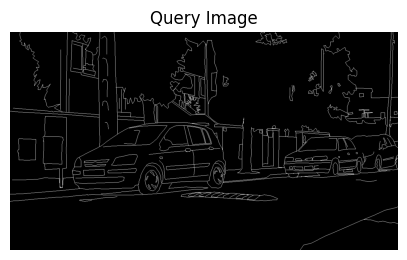

Top 3 Similar Images:


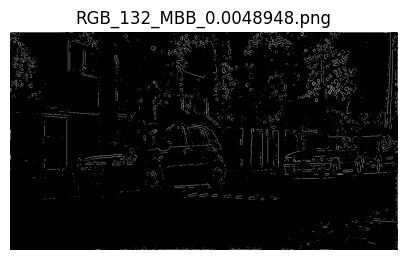

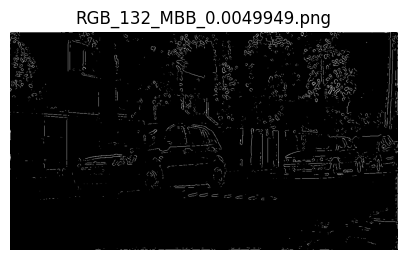

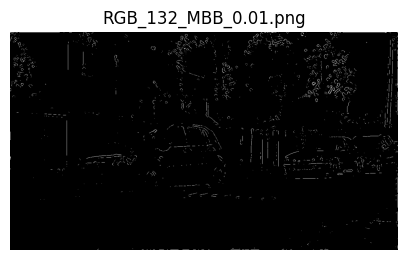

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

print("Query Image:")
plt.figure(figsize=(5, 5)) # Creating a new figure for the query image
query_img_display = mpimg.imread(queryImg)

if len(query_img_display.shape) == 2 or query_img_display.shape[2] == 1:
    query_img_display = plt.cm.gray(query_img_display)[:,:,:3] # Converting grayscale to RGB
plt.imshow(query_img_display)
plt.axis('off')
plt.title("Query Image")
plt.show()

# Display the top 3 similar images
print("Top 3 Similar Images:")
for i, img_name_bytes in enumerate(imlist):
    img_name = img_name_bytes.decode('utf-8')
    img_path = os.path.join(images_path, img_name)
    img = mpimg.imread(img_path)

    if len(img.shape) == 2 or img.shape[2] == 1:
        img = plt.cm.gray(img)[:,:,:3]
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name)
    plt.show()